# Day 21

https://adventofcode.com/2020/day/21

In [32]:
def readInput(filename):

    with open(filename) as f:
        lines = [ l.strip("\n").replace(")","").split(" (contains ") for l in f.readlines() ]
    
    food = []
    for l in lines: 
        i = l[0].split(" ")
        a = l[1].split(", ")
        food.append((i,a))
    
    ingrs = []
    alleg = []

    for i,a in food:
        for _i in i:
            if not _i in ingrs:
                ingrs.append(_i)
        for _a in a:
            if not _a in alleg:
                alleg.append(_a)
            
    return food, ingrs, alleg

In [144]:
food, ingrs, aller = readInput("data/day21test0.txt")
#food, ingrs, aller = readInput("data/input21.txt")
food, ingrs, aller

([(['mxmxvkd', 'kfcds', 'sqjhc', 'nhms'], ['dairy', 'fish']),
  (['trh', 'fvjkl', 'sbzzf', 'mxmxvkd'], ['dairy']),
  (['sqjhc', 'fvjkl'], ['soy']),
  (['sqjhc', 'mxmxvkd', 'sbzzf'], ['fish'])],
 ['mxmxvkd', 'kfcds', 'sqjhc', 'nhms', 'trh', 'fvjkl', 'sbzzf'],
 ['dairy', 'fish', 'soy'])

In [221]:
# I can recycle the "ticket" solution from Day 16!

# Let's begin with representing each food as a ingredients N_foods x N_ingredients x N_allergen matrix

#food, ingrs, aller = readInput("data/day21test0.txt")
food, ingrs, aller = readInput("data/input21.txt")

foodlist = [] # N_foods x N_ingredients x N_allergen matrix
for i,a in food:
    foodmat = [] # N_ingredients x N_allergen  matrix for a given food
    for _a in aller:
        row = []
        for _i in ingrs:
            if _a in a:
                if _i in i:
                    row.append(1)
                else:
                    row.append(0)
            else: # allergen not in food, thus food cannot be used to decide...
                row.append(1) # ... therefore, store row of 1's in matrix for later ANDing
        foodmat.append(row)  
    foodlist.append(foodmat)
    
# print(foodlist)

# Now make the AND of all foods' ingredient vs allergen matrices. This returns a matrix 
# N_ingredients x N_allergen food w/o a given allergen got a 1's row to allow proper ANDing

import numpy as np

foodall = np.ones((len(aller),len(ingrs)),dtype=int)

for ja in range(len(aller)):
    for ji in range(len(ingrs)):
        foodand = foodlist[0][ja][ji] # first food to inizialize
        for thisfood in foodlist:
            foodand = foodand and thisfood[ja][ji]
        foodall[ja][ji] = foodand

corresp = []

while True:
    unique = [ n.sum() for n in foodall ]
    uu = [i for i, e in enumerate(unique) if e == 1]
    for u in uu:
        if u in corresp:
            continue
        else:
            mask = foodall[u]
            for i in range(len(foodall)):
                if i==u:
                    continue
                else:
                    b = foodall[i]
                    masked = [ bb and not mm for bb,mm in zip(b,mask)]
                    foodall[i] = masked
            corresp.append(u)
    if len(corresp) == len(foodall):
        break
        
#print(foodall)

<ipython-input-222-9ff085c10b14>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ingrs)
<ipython-input-222-9ff085c10b14>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(aller)


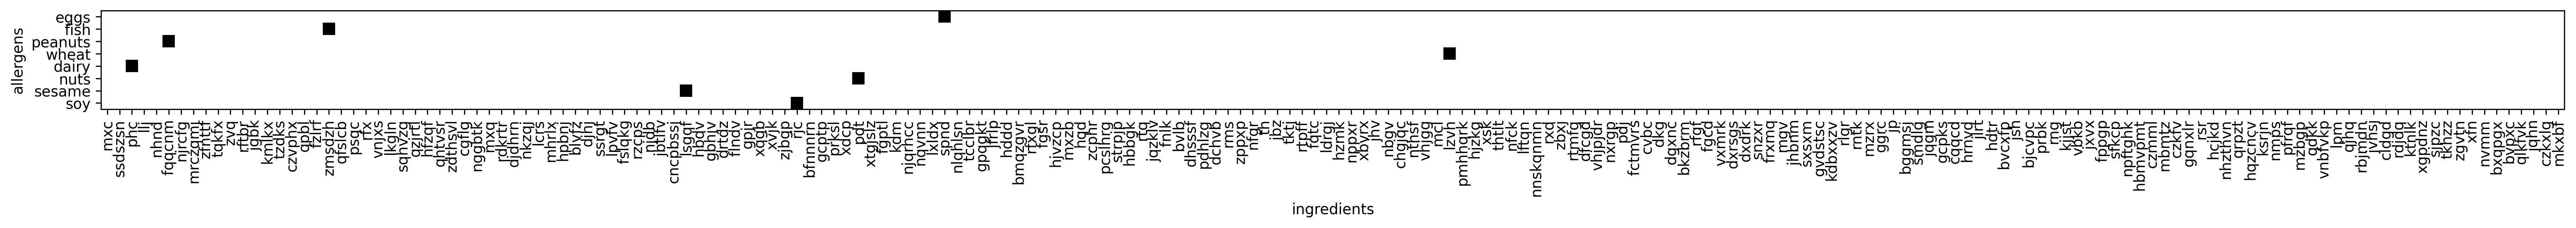

In [222]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,15),dpi=300)
ax.set_xticklabels(ingrs)
ax.set_yticklabels(aller)
plt.xticks(rotation=90)
plt.xticks(range(len(ingrs)))
plt.yticks(range(len(aller)))
im = ax.imshow(foodall,cmap="binary")
ax.set_xlabel('ingredients')
ax.set_ylabel('allergens')

plt.show()

In [223]:
# select ingredients that are not allergens
notaller = []
for j in range(len(foodall[0])):
    if sum(foodall[:,j])==0:
        notaller.append(ingrs[j])

# count their occurrences in foods
count = 0
for i,a in food:
    for _i in i:
        if _i in notaller:
            count += 1
            
print("Solution Part 1 =",count)

Solution Part 1 = 2125


## Part 2

In [224]:
# collect allergen names
allnames = []
for j in range(len(foodall[0])):
    if sum(foodall[:,j])==1: # this is an allergen
        allname = aller[np.where(foodall[:,j]==1)[0][0]]
        allnames.append((allname,ingrs[j],))

# sort by allergen name
allnames.sort(key=lambda tup: tup[0])

# make canonical list
canlist = ""
for a,i in allnames:
    canlist += i+","
canlist = canlist[:-1] # remove last comma

print("Solution Part 2 =",canlist)

Solution Part 2 = phc,spnd,zmsdzh,pdt,fqqcnm,lsgqf,rjc,lzvh
